In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
from scipy.misc import imread, imsave
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

from src.enhancer import ImageComparator
from src.enhancer.enhancers import ENHANCERS

In [3]:
base_path = Path('test-2')
originals_path = base_path / 'original'
masks_path = base_path / 'mask'
weight_maps_path = base_path / 'weight-map'

filenames = [file.stem for file in originals_path.iterdir()]
filenames

['flickr-ferrari',
 'flickr-bee',
 'flickr-hamster',
 'strawberry-3',
 'strawberry-2',
 'flickr-candle',
 'flickr-butterflies',
 'strawberry-1',
 'flickr-sunflower',
 'flickr-strawberry']

(-0.5, 499.5, 332.5, -0.5)

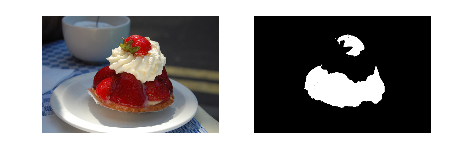

In [4]:
filename = 'z-values/strawberry-local.pkl'
zcollection = pickle.load(open(filename, 'rb'))

for key in zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist').descriptors:
    dir_path = base_path / key
    dir_path.mkdir(exist_ok=True, parents=True)

keyword = 'strawberry-1'
image = imread(originals_path / ('%s.jpg' % keyword))
seg_b = imread(masks_path / ('%s-mask.png' % keyword)).astype(np.bool)

plt.rcParams['figure.figsize'] = 5, 5
plt.subplot(121)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.imshow(seg_b, cmap='gray')
plt.axis('off')

In [85]:
from src.descriptors.descriptors import DESCRIPTORS
image_comparator = ImageComparator()

for key in zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist').descriptors:
    delta, _ = image_comparator.compare_descriptor(image, key, zcollection.descriptors[key])
    z_delta = zcollection.descriptors[key].descriptor * delta
    
    # Global enhancement
    result_g = ENHANCERS[key].enhance(image, z_delta, 2)
    imsave(base_path / key / ('%s-g-g.jpg' % keyword), result_g)

    # Local enhancement
    result_l = ENHANCERS[key].enhance(image, z_delta, 2, mask=seg_b)
    imsave(base_path / key / ('%s-g-l.jpg' % keyword), result_l)
    
print(image_comparator.compare(image, zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist'))[0])
# print(image_comparator.compare(image, zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
#                                               'frequency_hist'), seg_b)[0])

rgb_hist 0.0250183001278
lch_hist 0.0560371944279
lab_hist 0.0360238251394
hue_angle_hist 0.244986817384
chroma_hist 0.229297973803
hue_angle_hist


# Working here now!

rgb_hist 0.0250183001278
lch_hist 0.0560371944279
lab_hist 0.0360238251394
hue_angle_hist 0.244986817384
chroma_hist 0.229297973803
hue_angle_hist


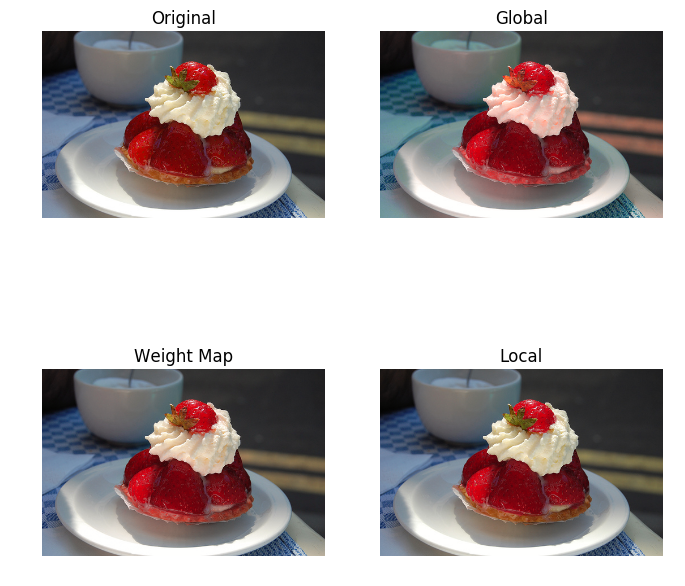

In [88]:
image_comparator = ImageComparator()
key, z_delta = image_comparator.compare(image, zcollection)
print(key)

# Global enhancement
result_g = ENHANCERS[key].enhance(image, z_delta, 1)
#imsave(g_g_path / ('%s.jpg' % keyword), result_g)

# Mask based enhancement
weight_map = ENHANCERS[key].compute_weight_map(image, zcollection.descriptors[key].descriptor)
result_w = weight_map * result_g + (1 - weight_map) * image
result_w = result_w.astype(np.uint8)
# imsave(weight_maps_path / ('%s.jpg' % keyword), weight_map)
# imsave(g_w_path / ('%s.jpg' % keyword), result_w)
       
# Local enhancement
result_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
# imsave(g_l_path / ('%s.jpg' % keyword), result_l)

plt.rcParams['figure.figsize'] = 8, 8
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(result_g)
plt.axis('off')
plt.title('Global')

plt.subplot(2, 2, 3)
plt.imshow(result_w)
plt.axis('off')
plt.title('Weight Map')

plt.subplot(2, 2, 4)
plt.imshow(result_l)
plt.axis('off')
plt.title('Local')

In [38]:
image_comparator = ImageComparator()
key, z_delta = image_comparator.compare(image, zcollection, mask=seg_b)
print(key)

# Global enhancement
result_g = ENHANCERS[key].enhance(image, z_delta, 2)
imsave(l_g_path / ('%s.jpg' % keyword), result_g)

# Mask based enhancement
weight_map = ENHANCERS[key].compute_weight_map(image, zcollection.descriptors[key].descriptor)
result_w = weight_map * result_g + (1 - weight_map) * image
result_w = result_w.astype(np.uint8)
imsave(l_w_path / ('%s.jpg' % keyword), result_w)
       
# Local enhancement
result_l = ENHANCERS[key].enhance(image, z_delta, 2, mask=seg_b)
imsave(l_l_path / ('%s.jpg' % keyword), result_l)

plt.rcParams['figure.figsize'] = 8, 8
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(result_g)
plt.axis('off')
plt.title('Global')

plt.subplot(2, 2, 3)
plt.imshow(result_w)
plt.axis('off')
plt.title('Weight Map')

plt.subplot(2, 2, 4)
plt.imshow(result_l)
plt.axis('off')
plt.title('Local')

[[[  2.43657500e-01   1.32446453e-01   2.20799863e-01   1.70418601e-02
     5.06724371e-03   1.84757507e-03   3.22487031e-04   5.73888072e-04]
  [  8.52878466e-02   4.51165102e-02   3.82653065e-02   1.10823112e-02
     8.32028873e-03   5.49985189e-03   1.07176602e-03   2.58249650e-03]
  [  8.42767283e-02   2.19780225e-02   8.21998436e-03   5.10204071e-03
     2.34096264e-03   1.00125512e-02   8.63589905e-03   1.14777614e-03]
  [  3.43218297e-02   2.67929919e-02   1.32426629e-02   4.47156373e-03
     2.62681162e-03   2.62813689e-03   5.01439301e-03   1.83328392e-03]
  [  9.44846403e-03   2.12862324e-02   7.22775934e-03   3.62892933e-02
     1.33912601e-02   2.71921023e-03   9.53463663e-04   1.26919663e-03]
  [  8.52622185e-03   3.12443892e-03   8.00120737e-03   5.98226255e-03
     4.34866222e-03   1.12951803e-03   8.06776923e-04   1.05766382e-03]
  [  1.49006620e-02   1.43652360e-04   8.61914188e-04   4.09973226e-03
     1.29623595e-03   1.19588210e-03   1.95582281e-04   2.68925651e-04]

NameError: name 'l_g_path' is not defined

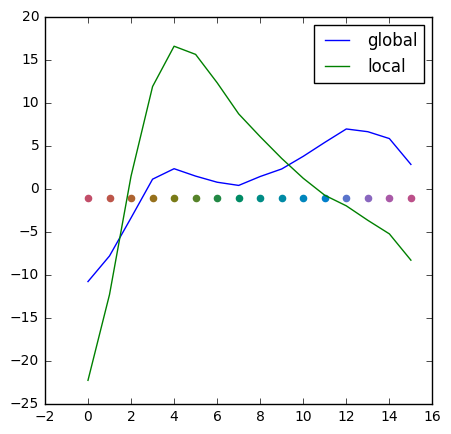

In [17]:
filename = 'z-values/strawberry.pkl'
local_filename = 'z-values/strawberry-local.pkl'
z = pickle.load(open(filename, 'rb'))
zl = pickle.load(open(local_filename, 'rb'))

from src.shared import rgb_hue

plt.plot(z.descriptors['gray_hist'].descriptor, label='global')
plt.plot(zl.descriptors['gray_hist'].descriptor, label='local')
for i in range(16):
    plt.scatter(i, -1, color=rgb_hue[i, :])
plt.legend()
    

In [82]:
zcollection.descriptors['rgb_hist'].descriptor

array([[[ -1.29818440e+01,  -1.12949132e+01,  -5.75083323e+00,
          -2.42299844e+00,  -1.56493374e+00,  -1.13161693e+00,
          -8.45194238e-01,  -4.65342989e-01],
        [ -1.97948764e+00,  -8.87329208e+00,  -8.04223798e+00,
          -4.91176355e+00,  -3.02717530e+00,  -2.18162763e+00,
          -1.37556773e+00,  -6.33008935e-01],
        [  5.20077718e+00,   2.53967048e-01,  -3.39937764e+00,
          -4.40579956e+00,  -3.66396142e+00,  -2.80811382e+00,
          -1.91924316e+00,  -1.02447686e+00],
        [  3.19294012e+00,   1.53507837e+00,   6.21222901e-01,
          -9.63881006e-01,  -2.51238709e+00,  -2.29389364e+00,
          -2.14687068e+00,  -1.04264814e+00],
        [  1.32747473e+00,   1.15431166e+00,   6.69697021e-01,
           1.41271508e-01,  -6.97372308e-01,  -8.02321839e-01,
          -1.33808079e+00,  -1.00086200e+00],
        [  6.82350108e-01,   8.04409825e-01,   5.11395418e-01,
           4.47082067e-01,   3.38675495e-02,  -4.11078176e-01,
          -4.6

In [121]:
a = z_delta
a = np.abs(z_delta)

a[a>0].size

145

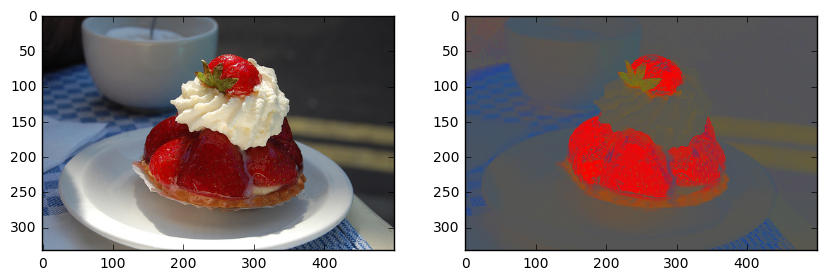

In [92]:
res = image.astype(np.float32)
rgb_sum = image.sum(axis=2)

res = image / rgb_sum[..., np.newaxis]

plt.rcParams['figure.figsize'] = 10, 10
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(res)